# 🎓 Predicting Student Performance  
This project uses the **Student Performance dataset** to predict **writing scores** based on **math** and **reading scores** using Linear Regression.  

---  

## 📌 Problem Statement  
Student exam performance datasets provide insights into how different academic skills relate to each other.  
Our **goal** is to:  
- Predict *writing scores* from *math* and *reading scores*  
- Evaluate model accuracy with regression metrics  
- Interpret which academic skills are stronger predictors of writing ability  

---  


## 1. 📊 Data Overview

# Predicting Student Marks
**Using Linear Regression to predict writing scores based on maths score and reading score**

In [ ]:
# lets import all the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1. Data Overview

In [ ]:
# import the dataset

df = pd.read_csv("/content/StudentsPerformance.xls")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


---  

## 2. 🔎 Exploratory Data Analysis (EDA)  

We will explore the distribution of exam scores and relationships between math, reading, and writing scores.  


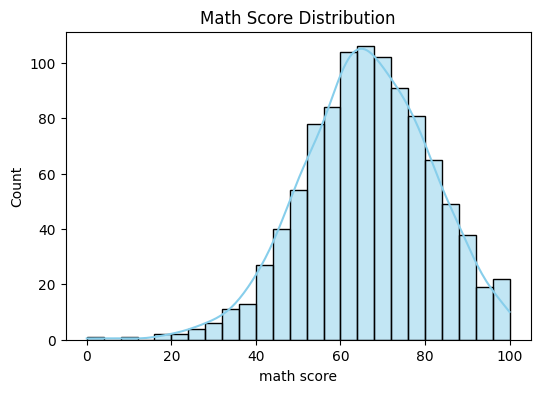

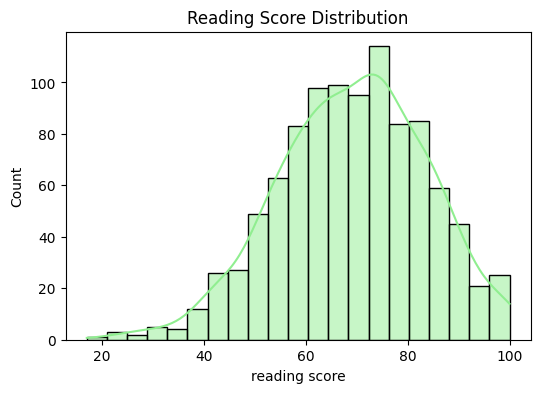

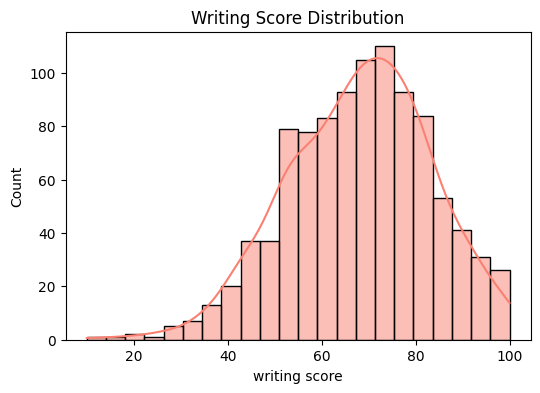

In [ ]:
# Distribution of Math, Reading, and Writing Scores
plt.figure(figsize=(6,4))
sns.histplot(df['math score'], kde=True, color="skyblue")
plt.title("Math Score Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['reading score'], kde=True, color="lightgreen")
plt.title("Reading Score Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['writing score'], kde=True, color="salmon")
plt.title("Writing Score Distribution")
plt.show()

> Reading scores, Math scores and Writing scores are normally distributed with slight left skewness

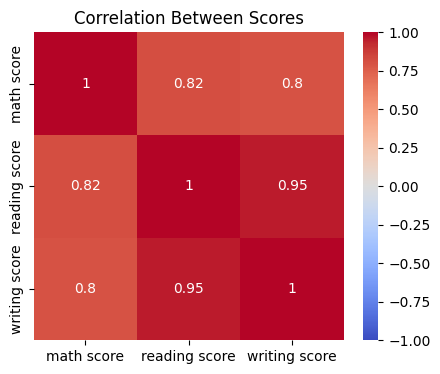

In [ ]:
# Correlation heatmap between exam scores
plt.figure(figsize=(5,4))
sns.heatmap(df[['math score','reading score','writing score']].corr(),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Scores")
plt.show()

> From the correlation heatmap it is clearly visible that our target (writing score) is highly correlated with the features math scores and reading scores.

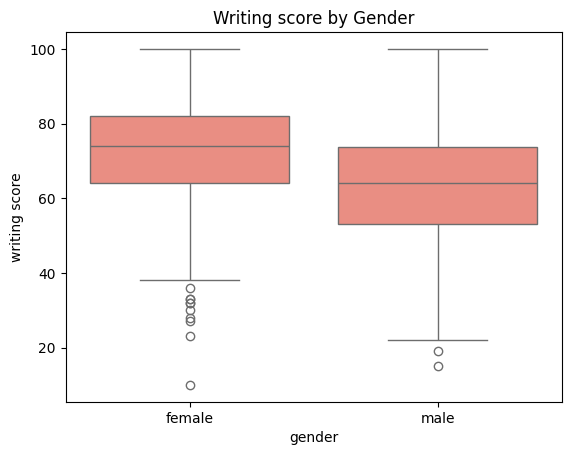

In [ ]:
# writing score by Gender
sns.boxplot(x='gender',y='writing score',data=df,color='salmon')
plt.title('Writing score by Gender')
plt.show()

> * This boxplot shows females have a slighty higher median writing scores compared to males.
> * Females have more outliers in writing scores compared to than males.

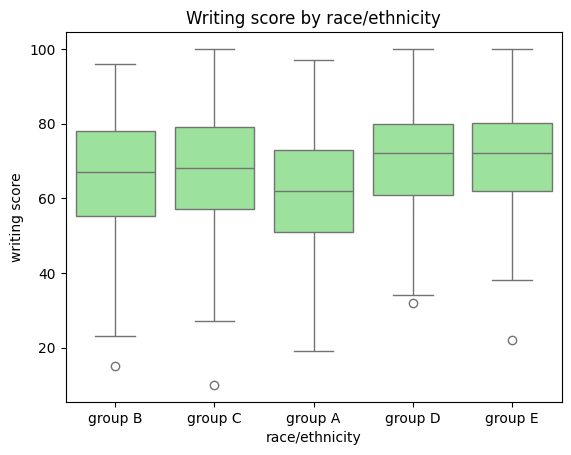

In [ ]:
# writing score by race/ethnictiy

sns.boxplot(x='race/ethnicity',y='writing score',data=df,color='lightgreen')
plt.title('Writing score by race/ethnicity')
plt.show()

> The boxplot shows that different ethnic groups have similar median writing scores, with comparable variability, though a few outliers are present in each group.

## 3. ⚙️ Data Preprocessing  

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# creating copy of the original dataset

df_original = df.copy()

# creating new features

df['avg_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df['is_prepared'] = (df['test preparation course'] == 'completed').astype('int16')
df['parent_higher_edu'] = ((df['parental level of education']=="bachelor's degree") | (df['parental level of education']=="master's degree") ).astype('int16')

# dropping test preparation course
df.drop('test preparation course',axis=1,inplace=True)

In [ ]:
# split dataset into features and targets

x = df.drop(['avg_score','writing score'],axis=1)
y = df['writing score']

In [ ]:
# encoding

x_encoded = pd.get_dummies(x,drop_first=True,dtype='int8')
x_encoded

,math score,reading score,is_prepared,parent_higher_edu,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
0,72,72,0,1,0,1,0,0,0,1,0,0,0,0,1
1,69,90,1,0,0,0,1,0,0,0,0,0,1,0,1
2,90,95,0,1,0,1,0,0,0,0,0,1,0,0,1
3,47,57,0,0,1,0,0,0,0,0,0,0,0,0,0
4,76,78,0,0,1,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,1,1,0,0,0,0,1,0,0,1,0,0,1
996,62,55,0,0,1,0,1,0,0,0,1,0,0,0,0
997,59,71,1,0,0,0,1,0,0,0,1,0,0,0,0
998,68,78,1,0,0,0,0,1,0,0,0,0,1,0,1


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y,test_size=0.2,random_state=42)

---  

## 4. 🤖 Model Training  

We will use **Linear Regression** to predict writing scores based on math and reading scores.  


In [ ]:
# Train model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print("Intercept:", linreg.intercept_)
print("Coefficients:", dict(zip(x_encoded.columns, linreg.coef_)))


Intercept: 4.488742530933202
Coefficients: {'math score': np.float64(0.2909251488736274), 'reading score': np.float64(0.6561679187934479), 'is_prepared': np.float64(3.510393078181698), 'parent_higher_edu': np.float64(0.8555319166120459), 'gender_male': np.float64(-5.83311313919226), 'race/ethnicity_group B': np.float64(0.22341788618111888), 'race/ethnicity_group C': np.float64(0.8589248313358568), 'race/ethnicity_group D': np.float64(2.0224159394261734), 'race/ethnicity_group E': np.float64(-1.265974516876966), "parental level of education_bachelor's degree": np.float64(0.4890900712947416), 'parental level of education_high school': np.float64(-1.4463286495343959), "parental level of education_master's degree": np.float64(0.36644184531730395), 'parental level of education_some college': np.float64(-0.31690537949649544), 'parental level of education_some high school': np.float64(-1.465184832720724), 'lunch_standard': np.float64(0.3821833240145007)}


---  

## 5. 📈 Model Evaluation  
We will evaluate using:  
- Mean Absolute Error (MAE)  
- Root Mean Squared Error (RMSE)  
- R² Score  


In [ ]:
# Predictions
y_pred = linreg.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

results = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R²"],
    "Value": [mae, rmse, r2]
})

results


,Metric,Value
0,MAE,3.200272
1,RMSE,3.861479
2,R²,0.938133


---  

## 6. 📊 Actual vs Predicted Writing Scores  


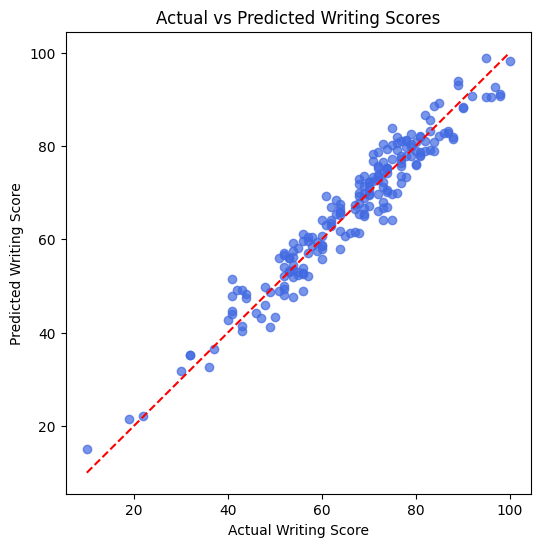

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="royalblue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Writing Score")
plt.ylabel("Predicted Writing Score")
plt.title("Actual vs Predicted Writing Scores")
plt.show()


> The scatter plot shows that the predicted marks closely follow the actual marks, indicating the model captures the overall trend well, with minor deviations.

---  

## 7. ✅ Conclusion  

- **Reading and math scores strongly predict writing scores** (high correlation).  
- **Linear Regression performed well** with low errors and high R².  
- Model shows that improvements in reading/math are closely tied to writing performance.  